<a href="https://colab.research.google.com/github/sofiapapadron/IME_IAA/blob/main/Teoria/2_Clasificacion_imagenes_Keras/4_Entrenar_CNN_Personalizadas/apps/1_Rotten_vs_Fresh.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# <font style="color:rgb(50, 120, 229);"> Proyecto 1: Clasificación de frutas </font>

**Objetivo:**

El objetivo de este proyecto es utilizar el dataset **Fresh and Rotten Fruits** para crear un modelo de clasificación que permita diferenciar entre frutas frescas y frutas podridas.

El dataset contiene imágenes de las siguientes frutas:

- Fresh apples
- Fresh bananas
- Fresh oranges
- Rotten apples
- Rotten bananas
- Rotten oranges

**Puedes utilizar un modelo pre-entrenado o entrenar tu propio modelo desde cero.**

<font style="color:rgb(50, 120, 229);">Recomedaciones:</font>

- Entrena el modelo en Google Colab.
- Recuerda activar la GPU en Google Colab para acelerar el entrenamiento. Para hacerlo ve a `Entorno de ejecución` -> `Cambiar tipo de entorno de ejecución` -> Selecciona `GPU`.

In [ ]:
#Actualizar TensorFlow a la última versión
%pip install tensorflow --upgrade -q

## <font style="color:rgb(50, 120, 229);"> 1. Descargar el dataset </font>

El dataset se encuentra en kaggle por lo que es importante que cuentes con tu archivo `kaggle.json` para poder descargar el dataset.

In [ ]:
%pip install -q kaggle

In [ ]:
from google.colab import files

uploaded = files.upload()

Saving kaggle.json to kaggle.json


In [ ]:
!mkdir -p ~/.kaggle
!mv kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

In [ ]:
!kaggle datasets download -d pedrodavidjuarez/fresh-vs-rotten-fruits
!unzip fresh-vs-rotten-fruits.zip

Dataset URL: https://www.kaggle.com/datasets/pedrodavidjuarez/fresh-vs-rotten-fruits
License(s): MIT
 92% 235M/256M [00:03<00:00, 73.0MB/s]
100% 256M/256M [00:03<00:00, 76.0MB/s]
Archive:  fresh-vs-rotten-fruits.zip
  inflating: fruits/train/freshapples/Screen Shot 2018-06-08 at 4.59.36 PM.png  
  inflating: fruits/train/freshapples/Screen Shot 2018-06-08 at 4.59.49 PM.png  
  inflating: fruits/train/freshapples/Screen Shot 2018-06-08 at 4.59.57 PM.png  
  inflating: fruits/train/freshapples/Screen Shot 2018-06-08 at 5.00.03 PM.png  
  inflating: fruits/train/freshapples/Screen Shot 2018-06-08 at 5.00.12 PM.png  
  inflating: fruits/train/freshapples/Screen Shot 2018-06-08 at 5.00.18 PM.png  
  inflating: fruits/train/freshapples/Screen Shot 2018-06-08 at 5.00.26 PM.png  
  inflating: fruits/train/freshapples/Screen Shot 2018-06-08 at 5.00.35 PM.png  
  inflating: fruits/train/freshapples/Screen Shot 2018-06-08 at 5.00.43 PM.png  
  inflating: fruits/train/freshapples/Screen Shot 2018-

## <font style="color:rgb(50, 120, 229);"> 2. Importar el dataset </font>

Una vez descargado el dataset, importa las librerías necesarias y realiza la importación del dataset utilizando la función `image_dataset_from_directory` de Keras.

El dataset tiene la siguiente estructura:

```bash
fruits/
    │
    └───train/
    └───valid/
```

In [ ]:
# prompt: Importar el dataset

import tensorflow as tf
IMAGE_SIZE = (224, 224)
BATCH_SIZE = 64
train_dataset = tf.keras.utils.image_dataset_from_directory(
    'fruits/train',
    labels='inferred',
    label_mode='categorical',
    image_size=IMAGE_SIZE,
    interpolation='nearest',
    batch_size=BATCH_SIZE,
    shuffle=True
)

validation_dataset = tf.keras.utils.image_dataset_from_directory(
    'fruits/valid',
    labels='inferred',
    label_mode='categorical',
    image_size=IMAGE_SIZE,
    interpolation='nearest',
    batch_size=BATCH_SIZE,
    shuffle=False
)

Found 1182 files belonging to 6 classes.
Found 329 files belonging to 6 classes.


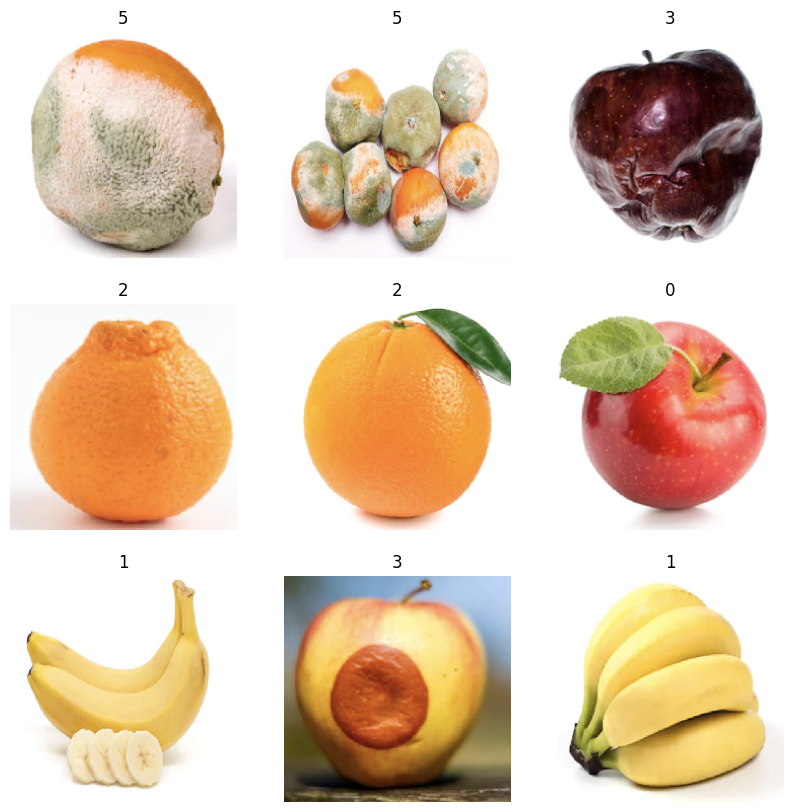

In [ ]:


import matplotlib.pyplot as plt
import numpy as np

image_batch, label_batch = next(iter(train_dataset))

# Mostrar las primeras 9 imágenes del lote
plt.figure(figsize=(10, 10))
for i in range(9):
  ax = plt.subplot(3, 3, i + 1)
  plt.imshow(image_batch[i].numpy().astype("uint8"))
  plt.title(np.argmax(label_batch[i]))
  plt.axis("off")

## <font style="color:rgb(50, 120, 229);"> 3. Explorar el dataset </font>

Muestra las clases del dataset utilizando el atributo `class_names` del dataset.

Con esto tendrás una idea de cuántas clases hay en el dataset y que orden siguen.

In [ ]:

train_dataset.class_names

['freshapples',
 'freshbanana',
 'freshoranges',
 'rottenapples',
 'rottenbanana',
 'rottenoranges']

Toma un `batch` de imágenes del dataset utilizando la función `take` y visualiza algunas imágenes.

Esto te permitirá conocer la estructura del dataset y verificar que las imágenes se han importado correctamente.

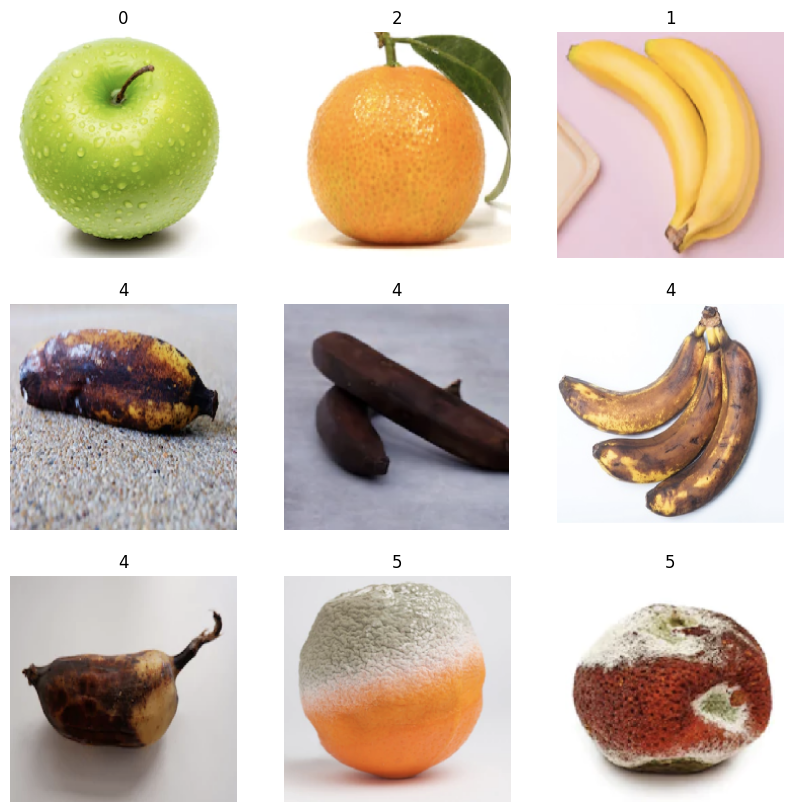

In [ ]:

for images, labels in train_dataset.take(1):
  plt.figure(figsize=(10, 10))
  for i in range(9):
    ax = plt.subplot(3, 3, i + 1)
    plt.imshow(images[i].numpy().astype("uint8"))
    plt.title(np.argmax(labels[i]))
    plt.axis("off")

## <font style="color:rgb(50, 120, 229);"> 4. Crear el modelo </font>

Crea un modelo de clasificación que permita diferenciar entre frutas frescas y frutas podridas.

**Se recomienda utilizar un modelo pre-entrenado.**

In [ ]:
import tensorflow as tf
from tensorflow.keras.applications import MobileNetV2
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D
from tensorflow.keras.models import Model

# Definir el modelo pre-entrenado (MobileNetV2)
base_model = MobileNetV2(weights='imagenet', include_top=False, input_shape=(224, 224, 3))

# Congelar las capas del modelo base
for layer in base_model.layers:
    layer.trainable = False

# Agregar capas personalizadas para la clasificación
x = base_model.output
x = GlobalAveragePooling2D()(x)
x = Dense(1024, activation='relu')(x)
predictions = Dense(6, activation='softmax')(x)  # 6 clases de frutas

# Crear el modelo final
model = Model(inputs=base_model.input, outputs=predictions)

# Resumen del modelo
model.summary()


Model: "functional_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)              ┃ Output Shape           ┃        Param # ┃ Connected to           ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━┩
│ input_layer_1             │ (None, 224, 224, 3)    │              0 │ -                      │
│ (InputLayer)              │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ Conv1 (Conv2D)            │ (None, 112, 112, 32)   │            864 │ input_layer_1[0][0]    │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ bn_Conv1                  │ (None, 112, 112, 32)   │            128 │ Conv1[0][0]            │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ Conv1_relu (ReLU)         │ (None, 112, 112, 32)   │              0 │ bn_Conv1[0][0]         │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ expanded_conv_depthwise   │ (None, 112, 112, 32)   │            288 │ Conv1_relu[0][0]       │
│ (DepthwiseConv2D)         │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ expanded_conv_depthwise_… │ (None, 112, 112, 32)   │            128 │ expanded_conv_depthwi… │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ expanded_conv_depthwise_… │ (None, 112, 112, 32)   │              0 │ expanded_conv_depthwi… │
│ (ReLU)                    │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ expanded_conv_project     │ (None, 112, 112, 16)   │            512 │ expanded_conv_depthwi… │
│ (Conv2D)                  │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ expanded_conv_project_BN  │ (None, 112, 112, 16)   │             64 │ expanded_conv_project… │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ block_1_expand (Conv2D)   │ (None, 112, 112, 96)   │          1,536 │ expanded_conv_project… │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ block_1_expand_BN         │ (None, 112, 112, 96)   │            384 │ block_1_expand[0][0]   │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ block_1_expand_relu       │ (None, 112, 112, 96)   │              0 │ block_1_expand_BN[0][… │
│ (ReLU)                    │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ block_1_pad               │ (None, 113, 113, 96)   │              0 │ block_1_expand_relu[0… │
│ (ZeroPadding2D)           │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ block_1_depthwise         │ (None, 56, 56, 96)     │            864 │ block_1_pad[0][0]      │
│ (DepthwiseConv2D)         │                        │                │                        │
├──────────────────────

 Total params: 3,575,878 (13.64 MB)

 Trainable params: 1,317,894 (5.03 MB)

 Non-trainable params: 2,257,984 (8.61 MB)

## <font style="color:rgb(50, 120, 229);"> 5. Entrenar el modelo </font>

Entrena el modelo utilizando el dataset de entrenamiento y valida el modelo utilizando el dataset de validación.

Debes incluir lo siguiente:

- El uso de `EarlyStopping` para evitar el sobreajuste.
- El uso de `ModelCheckpoint` para guardar el mejor modelo.

El modelo debe de guardarse con la extensión `.keras`. Para versiones anteriores de TensorFlow, el modelo se guarda con la extensión `.h5`.

In [ ]:
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint

# Definir los callbacks
early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)
model_checkpoint = ModelCheckpoint('best_model.keras', monitor='val_accuracy', save_best_only=True)

# Compilar el modelo
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Entrenar el modelo
history = model.fit(
    train_dataset,
    epochs=20,  # Ajusta el número de épocas según sea necesario
    validation_data=validation_dataset,
    callbacks=[early_stopping, model_checkpoint]
)

Epoch 1/20
19/19 ━━━━━━━━━━━━━━━━━━━━ 85s 4s/step - accuracy: 0.4454 - loss: 1.7115 - val_accuracy: 0.8176 - val_loss: 0.5722
Epoch 2/20
19/19 ━━━━━━━━━━━━━━━━━━━━ 79s 4s/step - accuracy: 0.7883 - loss: 0.5507 - val_accuracy: 0.8389 - val_loss: 0.4724
Epoch 3/20
19/19 ━━━━━━━━━━━━━━━━━━━━ 85s 4s/step - accuracy: 0.8859 - loss: 0.3545 - val_accuracy: 0.8632 - val_loss: 0.3856
Epoch 4/20
19/19 ━━━━━━━━━━━━━━━━━━━━ 137s 4s/step - accuracy: 0.9069 - loss: 0.2735 - val_accuracy: 0.8267 - val_loss: 0.4366
Epoch 5/20
19/19 ━━━━━━━━━━━━━━━━━━━━ 83s 4s/step - accuracy: 0.9053 - loss: 0.2686 - val_accuracy: 0.8693 - val_loss: 0.3794
Epoch 6/20
19/19 ━━━━━━━━━━━━━━━━━━━━ 79s 4s/step - accuracy: 0.9485 - loss: 0.1849 - val_accuracy: 0.8906 - val_loss: 0.3208
Epoch 7/20
19/19 ━━━━━━━━━━━━━━━━━━━━ 75s 4s/step - accuracy: 0.9530 - loss: 0.1579 - val_accuracy: 0.8571 - val_loss: 0.3683
Epoch 8/20
19/19 ━━━━━━━━━━━━━━━━━━━━ 82s 4s/step - accuracy: 0.9422 - loss: 0.1686 - val_accuracy: 0.8906 - val_loss

## <font style="color:rgb(50, 120, 229);"> 6. Descargar el modelo </font>

Descarga el modelo y guárdalo en tu computadora. Esto puede tardar unos minutos.

In [ ]:
from google.colab import files

files.download('best_model.keras')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

## <font style="color:rgb(50, 120, 229);"> 7. Prueba el modelo </font>

El siguiente código carga un grupo de imágenes de prueba y las clasifica utilizando el modelo que acabas de entrenar.

In [ ]:
from google.colab import files


uploaded = files.upload()

files = [file for file in uploaded.keys()]
print("Files uploaded:", files)

Saving Bad-apple.jpg to Bad-apple.jpg
Files uploaded: ['Bad-apple.jpg']


In [ ]:
from keras.models import load_model

model = load_model('./best_model.keras') #Cargar el mejor modelo guardado

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step


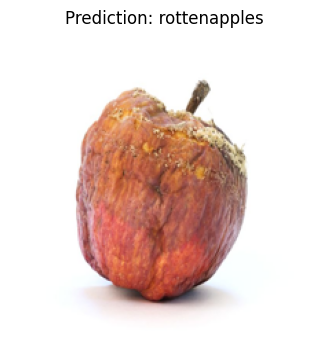

In [ ]:
from PIL import Image
import numpy as np

plt.figure(figsize=(4, 4))

for file in files:
  image = Image.open(file)
  image = image.resize((224, 224)) #Redimensionar la imagen a las dimensiones de entrada del modelo
  image = np.array(image)
  image = np.expand_dims(image, axis=0) # Agregar una dimensión extra para que sea un lote de un solo elemento

  prediction = model.predict(image)
  class_index = np.argmax(prediction)
  class_name = train_dataset.class_names[class_index]

  plt.imshow(image[0])
  plt.title(f'Prediction: {class_name}')
  plt.axis('off')
  plt.show()